In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline
import seaborn as sns
import pandas as pd
import math as mt
import scipy
import scipy.stats as stats
import statsmodels.stats.multicomp as mc
import researchpy as rp
import sys
import Bio
from Bio import SeqIO, SeqFeature
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
import os

from IPython.display import display
pd.options.display.max_columns = 250
pd.options.display.max_rows = 800

Populating the interactive namespace from numpy and matplotlib


In [2]:
def build_snp_df(gff_dir,prefix,cds_start,cds_end):
    
    #parse in snpcalling and restrict to trfA_CDS
    count = 0
    for filename in os.listdir(gff_dir):
        sample_name=(filename.decode('utf-8').rstrip('.sorted.bam.var.txt'))
        sample = os.path.join(gff_dir, filename)
        if os.path.isfile(sample) and prefix in sample_name:
            df_sample = pd.read_table(sample.decode('utf-8'))
            df_cds = df_sample[df_sample.pos>cds_start]
            df_cds = df_cds[df_cds.pos<cds_end]
            #df_cds = df_sample.query("pos > cds_start & pos < cds_end")
            df_cds['Sample'] = sample_name
            
            df_cds.replace(to_replace = 0, value = 1, inplace=True)
            df_cds['norm_mismatch'] = df_cds.mismatches/df_cds.reads_all
            df_cds['norm_match'] = df_cds.matches/df_cds.reads_all
            df_cds['norm_A'] = df_cds['A']/df_cds.reads_all
            df_cds['norm_T'] = df_cds['T']/df_cds.reads_all
            df_cds['norm_C'] = df_cds['C']/df_cds.reads_all
            df_cds['norm_G'] = df_cds['G']/df_cds.reads_all
            
            aa_list = []
            aa_pos = []
            countaa = 1
            
            if count == 0:
                df_snp = df_cds.copy()
                count = 1
                
                for x in Seq(''.join(df_snp.ref)).translate():
                    aa_list.extend([x,x,x])
                    aa_pos.extend([countaa,countaa,countaa])
                    countaa=countaa+1
                
                
            if count == 1:
                df_snp = pd.concat([df_snp,df_cds])
            
    return df_snp
            



In [17]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_pVS1_snp=build_snp_df(gff_dir,'pVS1',2530,3605)

In [18]:
df_pVS1_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G
584,Gent_VS1,2531,G,13294,12355,13271,12333,23,22,1,1,1,1,15,15,1,1,8,7,13271,12333,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.001730,0.998270,0.001128,0.000602,0.000075,0.998270
585,Gent_VS1,2532,T,13177,12256,13132,12217,45,39,1,1,1,1,20,20,18,12,13132,12217,7,7,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.003415,0.996585,0.001518,0.996585,0.001366,0.000531
586,Gent_VS1,2533,G,13138,12230,13126,12218,9,9,3,3,1,1,3,3,1,1,6,6,13126,12218,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.000685,0.999087,0.000228,0.000457,0.000076,0.999087
587,Gent_VS1,2534,A,12954,12060,12891,12003,60,54,3,3,1,1,12891,12003,4,4,28,25,28,25,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.004632,0.995137,0.995137,0.002161,0.000309,0.002161
588,Gent_VS1,2535,G,13021,12133,13012,12125,9,8,1,1,1,1,4,3,1,1,5,5,13012,12125,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.000691,0.999309,0.000307,0.000384,0.000077,0.999309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Gent_VS1,3600,C,3069,2642,3057,2631,7,6,5,5,1,1,2,2,3057,2631,5,4,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.002281,0.996090,0.000652,0.001629,0.996090,0.000326
1280,Gent_VS1,3601,C,3082,2648,3080,2646,2,2,1,1,1,1,2,2,3080,2646,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000649,0.999351,0.000649,0.000324,0.999351,0.000324
1281,Gent_VS1,3602,T,3101,2661,3100,2660,1,1,1,1,1,1,1,1,1,1,3100,2660,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000322,0.999678,0.000322,0.999678,0.000322,0.000322
1282,Gent_VS1,3603,A,3117,2672,3117,2672,1,1,1,1,1,1,3117,2672,1,1,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000321,1.000000,1.000000,0.000321,0.000321,0.000321


In [19]:
gff_dir = os.fsencode("/Users/MThompson/science/Shih_Agro/Matthew_SNP/")
df_snp=build_snp_df(gff_dir,'pVS1',2530,3605)
sample_meta = pd.read_csv('sample_groups_pVS1.csv')
group_map = dict(zip(sample_meta['Sample'],sample_meta['Group']))
df_snp['Group'] = df_snp['Sample'].map(group_map)

aa_list = []
aa_pos = []

count = 1
for x in Seq(''.join(df_snp[df_snp.Sample=='pVS1-unselected-rep1_S19_L001_mapping'].ref)).translate():
    aa_list.extend([x,x,x])
    aa_pos.extend([count,count,count])
    count=count+1

df_aa = pd.DataFrame([aa_list,aa_pos]).transpose()

df_aa['pos'] = df_snp[df_snp.Sample=='pVS1-unselected-rep1_S19_L001_mapping'].pos.tolist()

aa_map = dict(zip(df_aa['pos'],df_aa[0]))
aapos_map = dict(zip(df_aa['pos'],df_aa[1]))

df_snp['AA'] = df_snp['pos'].map(aa_map)
df_snp['AApos'] = df_snp['pos'].map(aapos_map)
#df_snp['AApos'] = df_snp['AApos']-383
df_snp['AAInfo'] = df_snp.AA + df_snp.AApos.astype(str)




df_snp

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo
584,Gent_VS1,2531,G,13294,12355,13271,12333,23,22,1,1,1,1,15,15,1,1,8,7,13271,12333,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.001730,0.998270,0.001128,0.000602,0.000075,0.998270,No_Selection,V,1,V1
585,Gent_VS1,2532,T,13177,12256,13132,12217,45,39,1,1,1,1,20,20,18,12,13132,12217,7,7,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.003415,0.996585,0.001518,0.996585,0.001366,0.000531,No_Selection,V,1,V1
586,Gent_VS1,2533,G,13138,12230,13126,12218,9,9,3,3,1,1,3,3,1,1,6,6,13126,12218,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.000685,0.999087,0.000228,0.000457,0.000076,0.999087,No_Selection,V,1,V1
587,Gent_VS1,2534,A,12954,12060,12891,12003,60,54,3,3,1,1,12891,12003,4,4,28,25,28,25,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.004632,0.995137,0.995137,0.002161,0.000309,0.002161,No_Selection,S,2,S2
588,Gent_VS1,2535,G,13021,12133,13012,12125,9,8,1,1,1,1,4,3,1,1,5,5,13012,12125,1,1,pVS1-unselected-rep2_S20_L001_mapping,0.000691,0.999309,0.000307,0.000384,0.000077,0.999309,No_Selection,S,2,S2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Gent_VS1,3600,C,3069,2642,3057,2631,7,6,5,5,1,1,2,2,3057,2631,5,4,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.002281,0.996090,0.000652,0.001629,0.996090,0.000326,Selection_1,S,357,S357
1280,Gent_VS1,3601,C,3082,2648,3080,2646,2,2,1,1,1,1,2,2,3080,2646,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000649,0.999351,0.000649,0.000324,0.999351,0.000324,Selection_1,S,357,S357
1281,Gent_VS1,3602,T,3101,2661,3100,2660,1,1,1,1,1,1,1,1,1,1,3100,2660,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000322,0.999678,0.000322,0.999678,0.000322,0.000322,Selection_1,*,358,*358
1282,Gent_VS1,3603,A,3117,2672,3117,2672,1,1,1,1,1,1,3117,2672,1,1,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000321,1.000000,1.000000,0.000321,0.000321,0.000321,Selection_1,*,358,*358


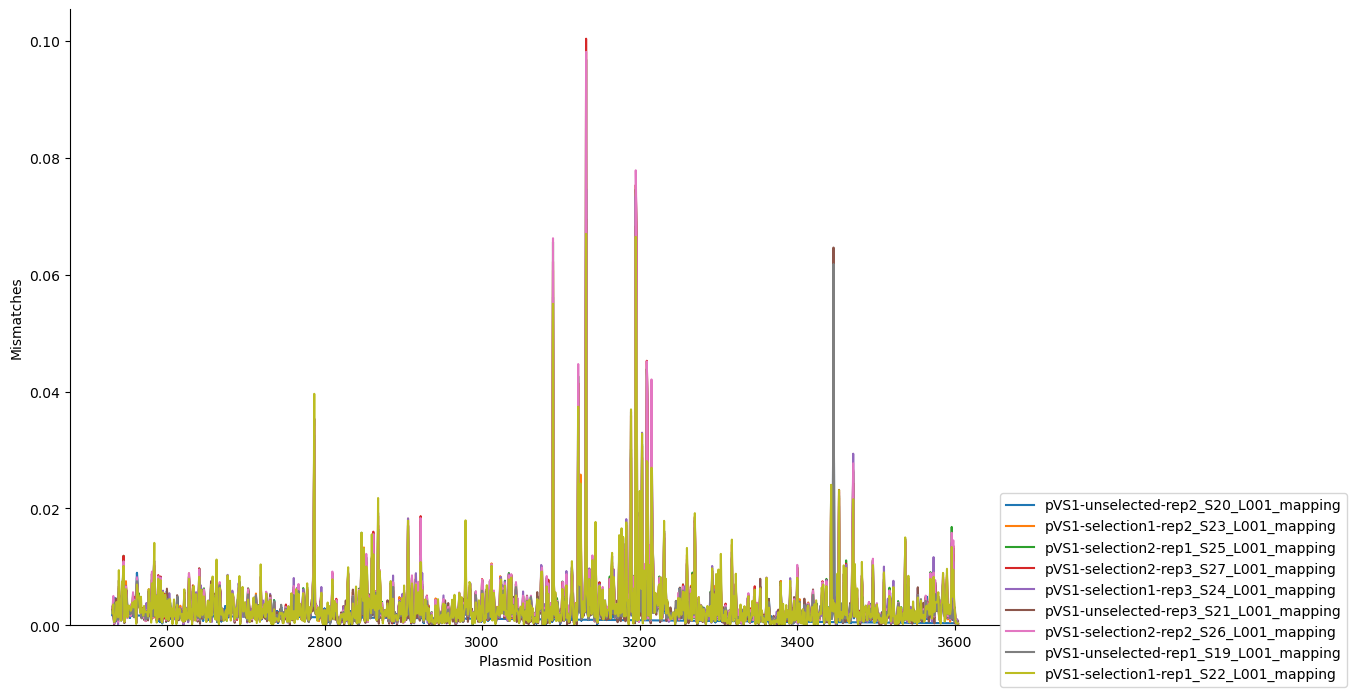

In [20]:
plt.figure(figsize=(12,8))
for cond in df_snp.Sample.unique():
    plt.plot(df_snp[df_snp.Sample==cond].pos,df_snp[df_snp.Sample==cond].norm_mismatch)
    
plt.legend(df_snp.Sample.unique(),loc=(1,-0.1))
plt.ylim(0,)
plt.ylabel('Mismatches')
plt.xlabel('Plasmid Position')
sns.despine()

In [21]:
df_snp.Sample.unique()

array(['pVS1-unselected-rep2_S20_L001_mapping',
       'pVS1-selection1-rep2_S23_L001_mapping',
       'pVS1-selection2-rep1_S25_L001_mapping',
       'pVS1-selection2-rep3_S27_L001_mapping',
       'pVS1-selection1-rep3_S24_L001_mapping',
       'pVS1-unselected-rep3_S21_L001_mapping',
       'pVS1-selection2-rep2_S26_L001_mapping',
       'pVS1-unselected-rep1_S19_L001_mapping',
       'pVS1-selection1-rep1_S22_L001_mapping'], dtype=object)

In [22]:
df_mutant = df_snp[df_snp.Sample.isin(['pVS1-selection1-rep2_S23_L001_mapping',
       'pVS1-selection2-rep1_S25_L001_mapping',
       'pVS1-selection2-rep3_S27_L001_mapping',
       'pVS1-selection1-rep3_S24_L001_mapping',
       'pVS1-selection2-rep2_S26_L001_mapping',
       'pVS1-selection1-rep1_S22_L001_mapping'])]

In [23]:
time_zero = df_snp[df_snp.Sample.isin(['pVS1-unselected-rep2_S20_L001_mapping',
       'pVS1-unselected-rep3_S21_L001_mapping',
       'pVS1-unselected-rep1_S19_L001_mapping'])].groupby(['pos']).mean()

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91835/392658223.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_zero = df_snp[df_snp.Sample.isin(['pVS1-unselected-rep2_S20_L001_mapping',


In [24]:
time_zero

,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,AApos
pos,,,,,,,,,,,,,,,,,,,,,,,,,,,
2531,19557.75,17147.25,19514.25,17108.75,43.25,38.50,1.00,1.00,1.00,1.0,31.25,27.25,1.00,1.00,11.75,11.00,19514.25,17108.75,1.0,1.0,0.002264,0.997731,0.001311,0.000900,0.000096,0.997731,1.0
2532,19367.75,16996.00,19305.75,16944.25,61.75,51.75,1.00,1.00,1.00,1.0,31.25,26.25,21.75,17.50,19305.75,16944.25,8.75,8.00,1.0,1.0,0.002989,0.997006,0.001459,0.997006,0.001054,0.000476,1.0
2533,19296.50,16948.50,19282.50,16935.50,11.00,10.00,3.00,3.00,1.00,1.0,3.50,3.25,1.00,1.00,7.50,6.75,19282.50,16935.50,1.0,1.0,0.000532,0.999273,0.000206,0.000374,0.000098,0.999273,1.0
2534,19023.00,16722.50,18943.25,16653.00,77.50,67.25,2.50,2.50,1.00,1.0,18943.25,16653.00,5.25,4.25,33.00,30.75,39.25,32.25,1.0,1.0,0.003997,0.995871,0.995871,0.001645,0.000275,0.002077,2.0
2535,19095.50,16808.25,19079.25,16794.25,16.25,14.00,1.00,1.00,1.00,1.0,7.50,6.25,2.25,2.25,7.00,6.00,19079.25,16794.25,1.0,1.0,0.001044,0.998956,0.000470,0.000437,0.000175,0.998956,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600,19023.25,16268.50,19003.75,16253.50,13.50,10.50,6.00,4.75,1.75,1.5,7.00,6.00,19003.75,16253.50,4.75,4.00,2.25,1.00,1.0,1.0,0.000719,0.998988,0.000420,0.000319,0.998988,0.000159,357.0
3601,19103.50,16315.25,19093.50,16308.00,10.00,7.25,1.00,1.00,1.75,1.0,3.75,2.75,19093.50,16308.00,5.75,4.25,1.25,1.00,1.0,1.0,0.000597,0.999403,0.000190,0.000396,0.999403,0.000137,357.0
3602,19210.50,16394.25,19197.25,16386.00,12.50,7.75,1.00,1.00,1.25,1.0,1.75,1.25,8.00,5.00,19197.25,16386.00,3.00,2.00,1.0,1.0,0.000590,0.999368,0.000147,0.999368,0.000332,0.000200,358.0


Text(0, 0.5, 'Mismatch Rate')

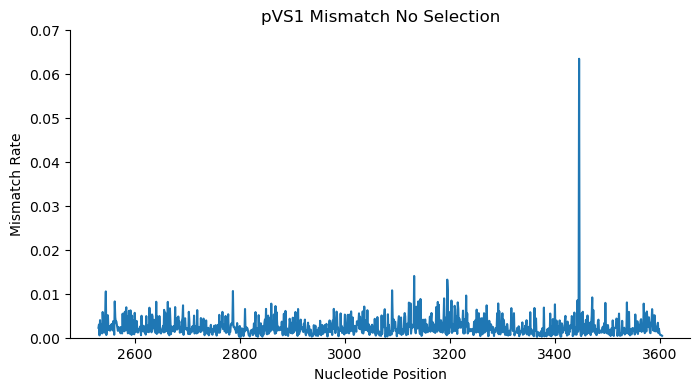

In [40]:
plt.figure(figsize=(8,4))
plt.plot(time_zero.index,time_zero.norm_mismatch)
sns.despine()
plt.title('pVS1 Mismatch No Selection')
plt.ylim(0,.07)
plt.xlabel('Nucleotide Position')
plt.ylabel('Mismatch Rate')

In [25]:
d_match = []
d_mismatch = []
d_a = []
d_t = []
d_c = []
d_g = []

for row in df_mutant.iterrows():
    temp_zero = time_zero[time_zero.index==row[1].pos]
    d_mismatch.append(row[1].norm_mismatch/temp_zero.norm_mismatch.values[0])
    d_match.append(row[1].norm_match/temp_zero.norm_match.values[0])
    d_a.append(row[1].norm_A/temp_zero.norm_A.values[0])
    d_t.append(row[1].norm_T/temp_zero.norm_T.values[0])
    d_c.append(row[1].norm_C /temp_zero.norm_C.values[0])
    d_g.append(row[1].norm_G/temp_zero.norm_G.values[0])





In [26]:
df_mutant['change_mismatch'] = d_mismatch
df_mutant['change_match'] = d_match
df_mutant['change_a'] = d_a
df_mutant['change_t'] = d_t
df_mutant['change_c'] = d_c
df_mutant['change_g'] = d_g


df_mutant

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91835/3016496591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_mismatch'] = d_mismatch
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91835/3016496591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mutant['change_match'] = d_match
/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91835/3016496591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,chrom,pos,ref,reads_all,reads_pp,matches,matches_pp,mismatches,mismatches_pp,deletions,deletions_pp,insertions,insertions_pp,A,A_pp,C,C_pp,T,T_pp,G,G_pp,N,N_pp,Sample,norm_mismatch,norm_match,norm_A,norm_T,norm_C,norm_G,Group,AA,AApos,AAInfo,change_mismatch,change_match,change_a,change_t,change_c,change_g
683,Gent_VS1,2531,G,30788,27470,30701,27396,83,71,4,3,1,1,43,35,1,1,40,36,30701,27396,1,1,pVS1-selection1-rep2_S23_L001_mapping,0.002696,0.997174,0.001397,0.001299,0.000032,0.997174,Selection_1,V,1,V1,1.190761,0.999442,1.065508,1.444087,0.336739,0.999442
684,Gent_VS1,2532,T,30459,27181,30371,27102,84,76,4,3,1,1,45,42,27,25,30371,27102,12,9,1,1,pVS1-selection1-rep2_S23_L001_mapping,0.002758,0.997111,0.001477,0.997111,0.000886,0.000394,Selection_1,V,1,V1,0.922690,1.000105,1.012740,1.000105,0.840697,0.828267
685,Gent_VS1,2533,G,30410,27165,30393,27148,14,14,3,3,1,1,10,10,1,1,4,4,30393,27148,1,1,pVS1-selection1-rep2_S23_L001_mapping,0.000460,0.999441,0.000329,0.000132,0.000033,0.999441,Selection_1,V,1,V1,0.865995,1.000168,1.595944,0.351482,0.337186,1.000168
686,Gent_VS1,2534,A,29969,26795,29896,26728,70,64,3,3,1,1,29896,26728,15,13,23,22,32,29,1,1,pVS1-selection1-rep2_S23_L001_mapping,0.002336,0.997564,0.997564,0.000767,0.000501,0.001068,Selection_1,S,2,S2,0.584393,1.001700,1.001700,0.466568,1.821087,0.514061
687,Gent_VS1,2535,G,30094,26938,30069,26915,25,23,1,1,1,1,14,13,3,3,8,7,30069,26915,1,1,pVS1-selection1-rep2_S23_L001_mapping,0.000831,0.999169,0.000465,0.000266,0.000100,0.999169,Selection_1,S,2,S2,0.795832,1.000213,0.989796,0.607622,0.570468,1.000213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Gent_VS1,3600,C,3069,2642,3057,2631,7,6,5,5,1,1,2,2,3057,2631,5,4,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.002281,0.996090,0.000652,0.001629,0.996090,0.000326,Selection_1,S,357,S357,3.170458,0.997099,1.549979,5.107308,0.997099,2.047684
1280,Gent_VS1,3601,C,3082,2648,3080,2646,2,2,1,1,1,1,2,2,3080,2646,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000649,0.999351,0.000649,0.000324,0.999351,0.000324,Selection_1,S,357,S357,1.086704,0.999948,3.408113,0.819300,0.999948,2.371708
1281,Gent_VS1,3602,T,3101,2661,3100,2660,1,1,1,1,1,1,1,1,1,1,3100,2660,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000322,0.999678,0.000322,0.999678,0.000322,0.000322,Selection_1,*,358,*358,0.546347,1.000310,2.197452,1.000310,0.970036,1.615524
1282,Gent_VS1,3603,A,3117,2672,3117,2672,1,1,1,1,1,1,3117,2672,1,1,1,1,1,1,1,1,pVS1-selection1-rep1_S22_L001_mapping,0.000321,1.000000,1.000000,0.000321,0.000321,0.000321,Selection_1,*,358,*358,0.583574,1.000686,1.000686,2.281253,2.467303,0.606991


In [27]:
df_mutant.to_csv('Matthew_Rawish_pVS1_data.csv')

In [28]:
mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()
mutant_means

/var/folders/22/920700394m5b61z261p6sy0m0000gp/T/ipykernel_91835/1969063143.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mutant_means = df_mutant.groupby(by=['Group','pos','ref','AApos','AA','AAInfo']).mean()


reads_all      reads_pp  \
Group       pos  ref AApos AA AAInfo                               
Selection_1 2531 G   1     V  V1      13578.000000  12053.666667   
            2532 T   1     V  V1      13421.000000  11919.333333   
            2533 G   1     V  V1      13386.333333  11899.666667   
            2534 A   2     S  S2      13183.000000  11732.000000   
            2535 G   2     S  S2      13223.666667  11782.666667   
...                                            ...           ...   
Selection_2 3600 C   357   S  S357    57326.333333  47486.000000   
            3601 C   357   S  S357    57165.333333  47255.000000   
            3602 T   358   *  *358    57393.666667  47402.666667   
            3603 A   358   *  *358    57643.333333  47554.000000   
            3604 A   358   *  *358    57711.000000  47596.000000   

                                           matches    matches_pp  mismatches  \
Group       pos  ref AApos AA AAInfo                                           
Selection_1 2531 G   1     V  V1      13542.000000  12023.000000   34.666667   
            2532 T   1     V  V1      13378.000000  11882.000000   41.666667   
            2533 G   1     V  V1      13378.666667  11892.333333    5.666667   
            2534 A   2     S  S2      13151.000000  11703.000000   30.000000   
            2535 G   2     S  S2      13210.666667  11770.333333   13.000000   
...                                            ...           ...         ...   
Selection_2 3600 C   357   S  S357    57034.333333  47248.666667  157.333333   
            3601 C   357   S  S357    57139.333333  47237.666667   25.666667   
            3602 T   358   *  *358    57348.333333  47368.333333   41.333333   
            3603 A   358   *  *358    57616.000000  47539.666667   24.000000   
            3604 A   358   *  *358    57690.000000  47583.333333   20.333333   

                                      mismatches_pp   deletions  deletions_pp  \
Group       pos  ref AApos AA AAInfo                                            
Selection_1 2531 G   1     V  V1          29.666667    2.000000      1.666667   
            2532 T   1     V  V1          36.333333    2.000000      1.666667   
            2533 G   1     V  V1           5.333333    2.000000      2.000000   
            2534 A   2     S  S2          27.000000    2.000000      2.000000   
            2535 G   2     S  S2          12.333333    1.000000      1.000000   
...                                             ...         ...           ...   
Selection_2 3600 C   357   S  S357       123.333333  134.666667    114.000000   
            3601 C   357   S  S357        17.000000    1.000000      1.000000   
            3602 T   358   *  *358        31.000000    4.000000      3.666667   
            3603 A   358   *  *358        12.666667    3.333333      1.666667   
            3604 A   358   *  *358        12.000000    1.000000      1.000000   

                                      insertions  insertions_pp             A  \
Group       pos  ref AApos AA AAInfo                                            
Selection_1 2531 G   1     V  V1        1.000000       1.000000     18.666667   
            2532 T   1     V  V1        1.000000       1.000000     25.333333   
            2533 G   1     V  V1        1.000000       1.000000      4.333333   
            2534 A   2     S  S2        1.000000       1.000000  13151.000000   
            2535 G   2     S  S2        1.000000       1.000000      7.000000   
...                                          ...            ...           ...   
Selection_2 3600 C   357   S  S357      6.666667       4.333333     83.000000   
            3601 C   357   S  S357      2.666667       1.000000     12.333333   
            3602 T   358   *  *358      5.666667       1.666667      6.666667   
            3603 A   358   *  *358      2.666667       1.000000  57616.000000   
            3604 A   358   *  *358     11.666667       9.333333  57690.000000   

       

In [29]:
mutant_means = mutant_means.reset_index()

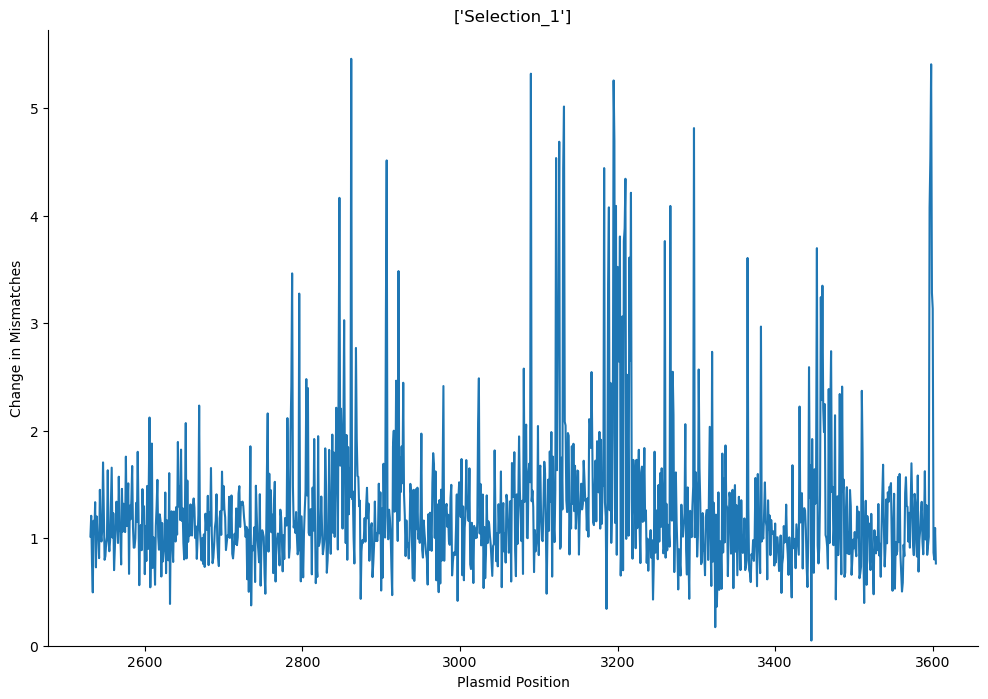

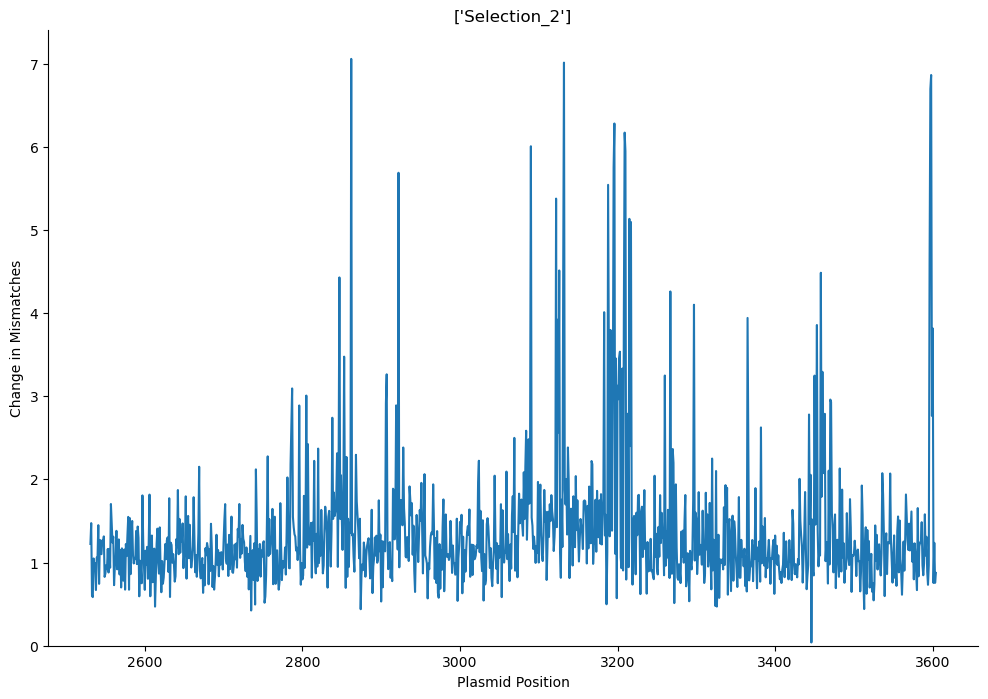

In [30]:
for cond in mutant_means.Group.unique():
    plt.figure(figsize=(12,8))
    plt.plot(mutant_means[mutant_means.Group==cond].pos,mutant_means[mutant_means.Group==cond].change_mismatch)
    plt.ylim(0,)
    plt.title(mutant_means[mutant_means.Group==cond].Group.unique())
    plt.ylabel('Change in Mismatches')
    plt.xlabel('Plasmid Position')
    sns.despine()

In [32]:
for x in [2,2.5,3,4,5,7]:
    print(x,len(mutant_means[mutant_means.change_mismatch>x].pos.unique()))



2 118
2.5 67
3 46
4 25
5 14
7 2


In [33]:
selected_snps = mutant_means[mutant_means.change_mismatch>4].pos.unique()

In [34]:
mutant_means[mutant_means.pos.isin(selected_snps)].sort_values(by='pos').to_csv('mathew_selected_pVS1muts.csv')

Text(0.5, 1.0, 'pVS1')

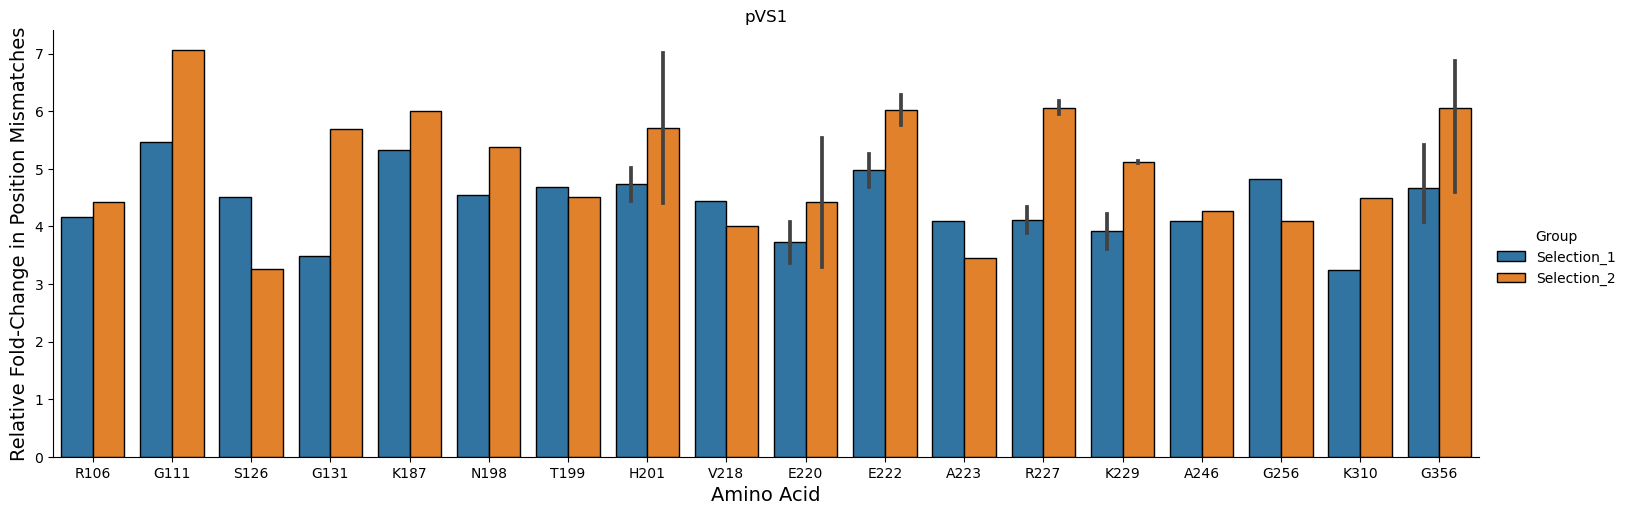

In [36]:
sns.catplot(data=mutant_means[mutant_means.pos.isin(selected_snps)],
            x='AAInfo',y='change_mismatch',hue='Group',kind='bar',aspect=3,edgecolor='black')
plt.ylabel('Relative Fold-Change in Position Mismatches',size=14)
plt.xlabel('Amino Acid',size=14)
plt.title('pVS1')

In [ ]:
#https://www.uniprot.org/uniprotkb/P07676/entry
#put AA at each position